In [3]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

(1) Preprocessing: Detect face and eyes
When we look at any image, most of the time we identify a person using a face. An image might contain multiple faces, also the face can be obstructed and not clear. The first step in our pre-processing pipeline is to detect faces from an image. Once face is detected, we will detect eyes, if two eyes are detected then only we keep that image otherwise discard it.
Now how do you detect face and eyes?
We will use haar cascade from opencv for this. Here is an article on this: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_objdetect/py_face_detection/py_face_detection.html?highlight=haar

In [4]:
img = cv2.imread('./test_images/sharapova1.jpg')
#Shows the 3 dimensions of the picture. X,Y, axis and rgb dimensions
img.shape

(555, 700, 3)

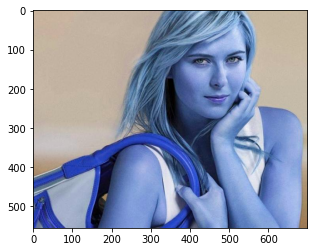

In [5]:
plt.imshow(img)

In [6]:
#This removes the rgb dimensions
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(555, 700)

In [7]:
#You can see how the computer sees the image here
gray

array([[175, 175, 175, ..., 176, 175, 174],
       [175, 175, 175, ..., 177, 175, 174],
       [175, 175, 175, ..., 177, 176, 174],
       ...,
       [ 84,  87,  88, ..., 113, 113, 113],
       [ 88,  89,  90, ..., 113, 113, 113],
       [ 93,  91,  91, ..., 112, 112, 112]], dtype=uint8)

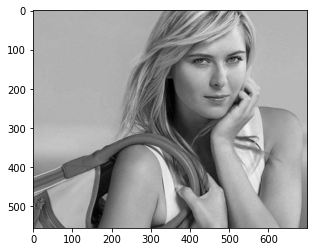

In [8]:
plt.imshow(gray, cmap='gray')

In [9]:
#This cascades were downloaded from the opencv github. The xml files are pretrained classfiers that help in detecting face,nose,eye,left eye etc.
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

#here we give input "gray" which is the pic above. It will detect faces from given input
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
#It gives x,y,height,width of X. where face is found
faces

array([[352,  38, 233, 233]])

In [10]:
#x,y,height,width
(x,y,w,h) = faces[0]
x,y,w,h

(352, 38, 233, 233)

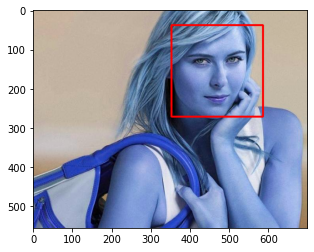

In [11]:
#drawing the red rectangle. 
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),4)
plt.imshow(face_img)

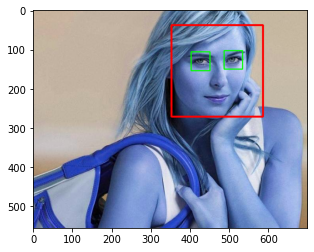

In [12]:
cv2.destroyAllWindows()
#Function to show detect face and eyes
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

(2) Preprocessing: Crop the facial region of the image

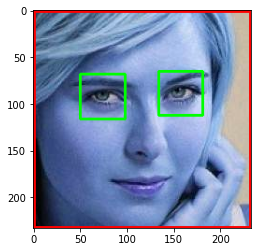

In [13]:
%matplotlib inline
#gives cropped image as its the piece inside the rectangle
plt.imshow(roi_color, cmap='gray')

(3) Preprocessing: Load image, detect face. If eyes >=2, then save and crop the face region


In [14]:
# python function that can take input image and returns cropped image (if face and eyes >=2 are detected)
#THIS TAKES image path as input
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

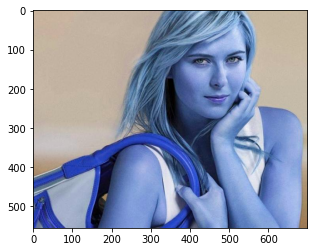

In [15]:
original_image = cv2.imread('./test_images/sharapova1.jpg')
plt.imshow(original_image)

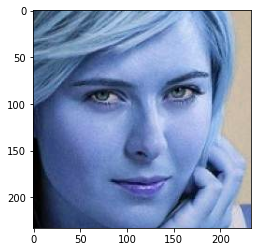

In [16]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/sharapova1.jpg')
plt.imshow(cropped_image)

In [17]:
path_to_data = "./images_dataset/"
path_to_cr_data = "./images_dataset/cropped/"


In [18]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [19]:

img_dirs

['./images_dataset/cropped',
 './images_dataset/lionel_messi',
 './images_dataset/maria_sharapova',
 './images_dataset/roger_federer',
 './images_dataset/serena_williams',
 './images_dataset/virat_kohli']

In [20]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [21]:
#for saving celebrity cropped images
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            #cv2.imwrite() method is used to save an image to any storage device. This will save the image according to the specified format in current working directory.
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./images_dataset/cropped/lionel_messi
Generating cropped images in folder:  ./images_dataset/cropped/maria_sharapova
Generating cropped images in folder:  ./images_dataset/cropped/roger_federer
Generating cropped images in folder:  ./images_dataset/cropped/serena_williams
Generating cropped images in folder:  ./images_dataset/cropped/virat_kohli


In [22]:
celebrity_file_names_dict

{'cropped': [],
 'lionel_messi': ['./images_dataset/cropped/lionel_messi/lionel_messi1.png',
  './images_dataset/cropped/lionel_messi/lionel_messi2.png',
  './images_dataset/cropped/lionel_messi/lionel_messi3.png',
  './images_dataset/cropped/lionel_messi/lionel_messi4.png',
  './images_dataset/cropped/lionel_messi/lionel_messi5.png',
  './images_dataset/cropped/lionel_messi/lionel_messi6.png',
  './images_dataset/cropped/lionel_messi/lionel_messi7.png',
  './images_dataset/cropped/lionel_messi/lionel_messi8.png',
  './images_dataset/cropped/lionel_messi/lionel_messi9.png',
  './images_dataset/cropped/lionel_messi/lionel_messi10.png',
  './images_dataset/cropped/lionel_messi/lionel_messi11.png',
  './images_dataset/cropped/lionel_messi/lionel_messi12.png',
  './images_dataset/cropped/lionel_messi/lionel_messi13.png',
  './images_dataset/cropped/lionel_messi/lionel_messi14.png',
  './images_dataset/cropped/lionel_messi/lionel_messi15.png',
  './images_dataset/cropped/lionel_messi/lionel


Manually examined cropped folder and delete any unwanted images

In [23]:
#This is the final dict after manual cleansing
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'lionel_messi': ['./images_dataset/cropped/lionel_messi\\lionel_messi1.png',
  './images_dataset/cropped/lionel_messi\\lionel_messi10.png',
  './images_dataset/cropped/lionel_messi\\lionel_messi11.png',
  './images_dataset/cropped/lionel_messi\\lionel_messi12.png',
  './images_dataset/cropped/lionel_messi\\lionel_messi13.png',
  './images_dataset/cropped/lionel_messi\\lionel_messi14.png',
  './images_dataset/cropped/lionel_messi\\lionel_messi15.png',
  './images_dataset/cropped/lionel_messi\\lionel_messi16.png',
  './images_dataset/cropped/lionel_messi\\lionel_messi17.png',
  './images_dataset/cropped/lionel_messi\\lionel_messi18.png',
  './images_dataset/cropped/lionel_messi\\lionel_messi19.png',
  './images_dataset/cropped/lionel_messi\\lionel_messi2.png',
  './images_dataset/cropped/lionel_messi\\lionel_messi20.png',
  './images_dataset/cropped/lionel_messi\\lionel_messi21.png',
  './images_dataset/cropped/lionel_messi\\lionel_messi22.png',
  './images_dataset/cropped/lionel_messi\

In [24]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

(4) Preprocessing: Use wavelet transform as a feature for traning our model

In [25]:
#In wavelet transformed image, you can see edges clearly and that can give us clues on various facial features such as eyes, nose, lips etc
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

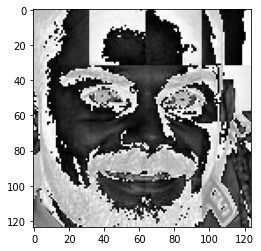

In [29]:
cropped_img = np.array(roi_color)
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

Images in cropped folder can be used for model training. We will use these raw images along with wavelet transformed images to train our classifier. Let's prepare X and y now

In [30]:
X, y = [], []
#Vertically stacking each picture
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])     

In [31]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(187, 4096)